<a href="https://colab.research.google.com/github/jbae99/CS3091_fits_data/blob/Assignment-2-John-Bae/Assignment_2_John_Bae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install 'astrodendro'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 4.9 MB/s 
  Created wheel for astrodendro: filename=astrodendro-0.2.0-py3-none-any.whl size=3160582 sha256=fd0311ca5319ff3cfb04248f89bd481a710bd73ac9e5d7e4dc695fd3e63fd9d2
  Stored in directory: /root/.cache/pip/wheels/70/dc/d0/d75a205319bc1be59adb997eea017aad751dcdddf94b72fb31
Successfully built astrodendro


Filename: DATA/cleanimage.G10.99_Feather_SiO.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (339, 367, 475)   float32   
Shape of plotted data: (367, 339)


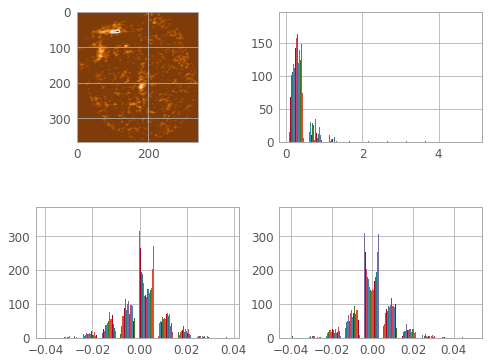

In [3]:
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import astrodendro 
from astrodendro import Dendrogram
from astrodendro import DendrogramPlotter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def createImage(plotData, noiseThresh):
  dataSlice1 = plotData[50,:,:]
  dataSlice2 = plotData[100,:,:]
  data = plotData.sum(axis = 0)
  print(f'Shape of plotted data: {data.shape}')

  
  plt.style.use(astropy_mpl_style)
  fig, axs = plt.subplots(2, 2)
  axs[0,0].imshow(data, cmap = mpl.cm.PuOr, vmin = noiseThresh)
  axs[0,1].hist(data, range = (noiseThresh, data.max()))
  axs[1,0].hist(dataSlice1)
  axs[1,1].hist(dataSlice2)
  plt.show()

def printSummary(data):
  print(f'\nSize: {data.size} \nShape: {data.shape} \nMin: {data.min()} \nMax: {data.max()} \nMean: {np.mean(data)} \nMedian: {np.median(data)} \nStandard Dev: {np.std(data)} \nFifth Percentile: {np.percentile(data, 5)} \nNintieth Percentile: {np.percentile(data, 95)}')

def calcNoise(data):
  resizedData = data[0,150:200,200:250]
  return np.std(resizedData)

def createDendro(data, noiseThresh):
  dendro = Dendrogram.compute(data, min_value = noiseThresh)
  v = dendro.viewer()
  v.show()

def main():
  
  hdul =   fits.open('DATA/cleanimage.G10.99_Feather_SiO.image.fits')

  hdul.info()
  
  ##hdr = hdul[0].header
  ##print(repr(hdr))
  data = hdul[0].data
  
  ##printSummary(data)

  noiseThresh = calcNoise(data)
  
  createImage(data, noiseThresh)

  ##createDendro(data, noiseThresh)

  
if __name__ == "__main__":
  main()

